## Individual Planning Report
### Predicting Newsletter Subscription from Player Characteristics
Name: Royyan Avatar Rizky Prabowo

Course: DSCI 100_003_GROUP_10

In [1]:
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [2]:
players <- read_csv("players.csv")
head(players)
nrow(players)
ncol(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] 196

[1] 7

In [3]:
glimpse(players)
summary(players)

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [5]:
players %>% summarise(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE),
    median_played_hours = median(played_hours, na.rm = TRUE),
    total_players = n(),
    subscribe_count = sum(subscribe == "TRUE", na.rm = TRUE),
    percentage_subscribe = subscribe_count / total_players * 100) %>%
round(2)

mean_played_hours,mean_age,median_played_hours,total_players,subscribe_count,percentage_subscribe
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.85,21.14,0.1,196,144,73.47


## 1. Data description
### Data description of players.csv
### Summary
- mean played hours: 5.85
- mean age 21.14
- median played hours 0.1
- total players 196
- subscribe count 144
- percentage subscribe 73.47

### Information
| Variable | Type | Description | Notes |
|----------|------|-------------|-------|
| Experience | Character | Experience level | |
| Subscribe | Categorical | Subscription type | |
| HashedEmail | Character | Player identity | |
| Played hours | Numeric | Total hours played | |
| Name | Character | Player name | |
| Gender | Character | Player gender | |
| Age | Numeric | Player's age | |

## Possibility Issues
- The gender variable contains inconsistent values (“Male,” “Female,” and “Non-binary”), which could make filtering the data difficult.
- The age variable contains inconsistent values ("NA"), which could make filtering the data difficult.

## Unseen Possibility Issues
- Potential data imbalance in the subscribe variable (many TRUE values).
- Bias in participation (many Male gender compared than others).

## How the data are collected
- The experience variable was automatically recorded by the game system.
- The subscription status are colleced from the game subscription records.
- The hashed email are generated from players registered email addresses.
- The played hours are automatically tracked by the system.
- The name are obtained from the player's registered or in-game display name.

## 2. Questions
#### Broad Question
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter?
#### Spesific Question
How do these predictive age, experience and played hours predict whether someone is subscribed or not?

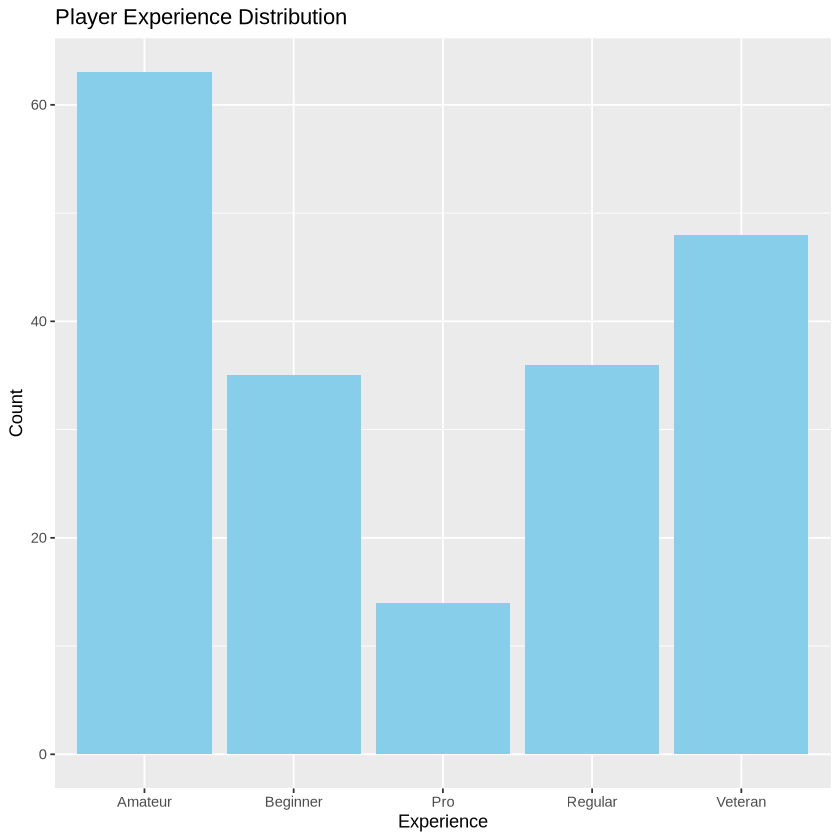

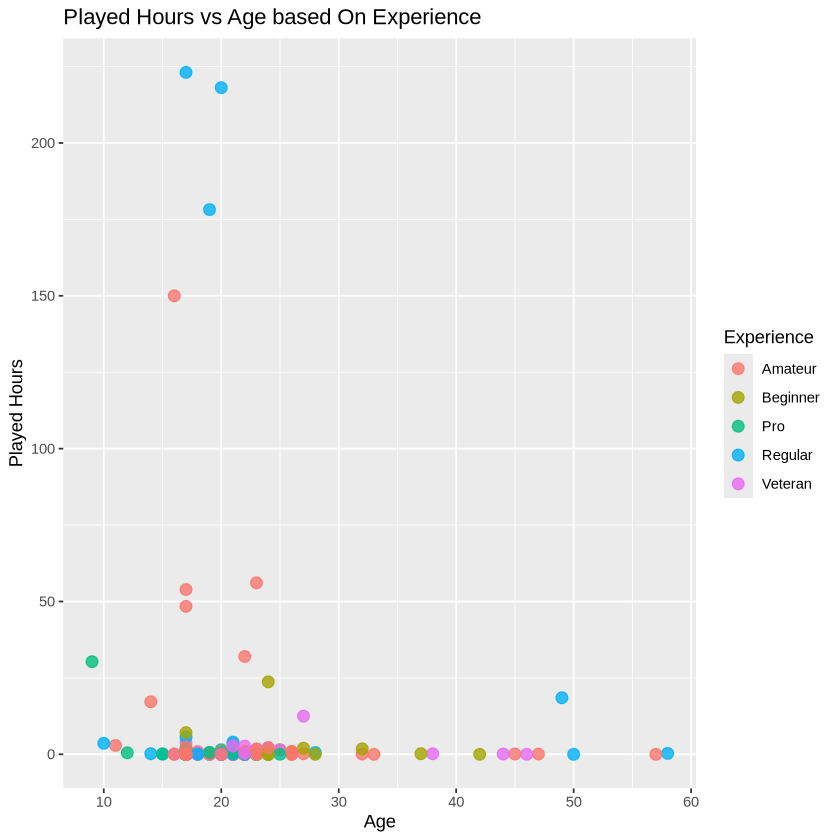

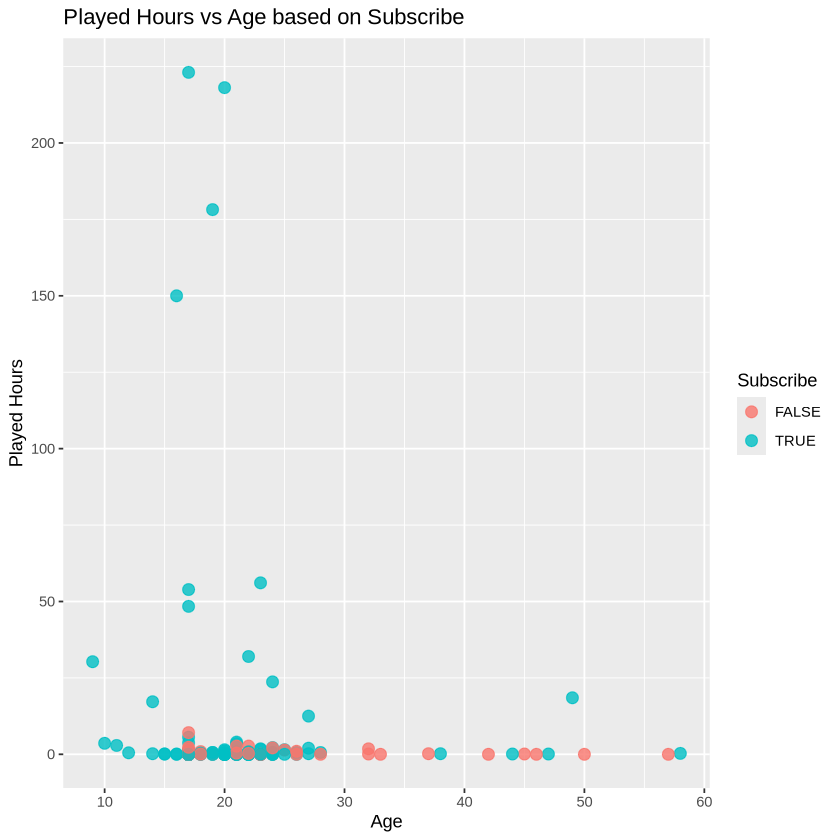

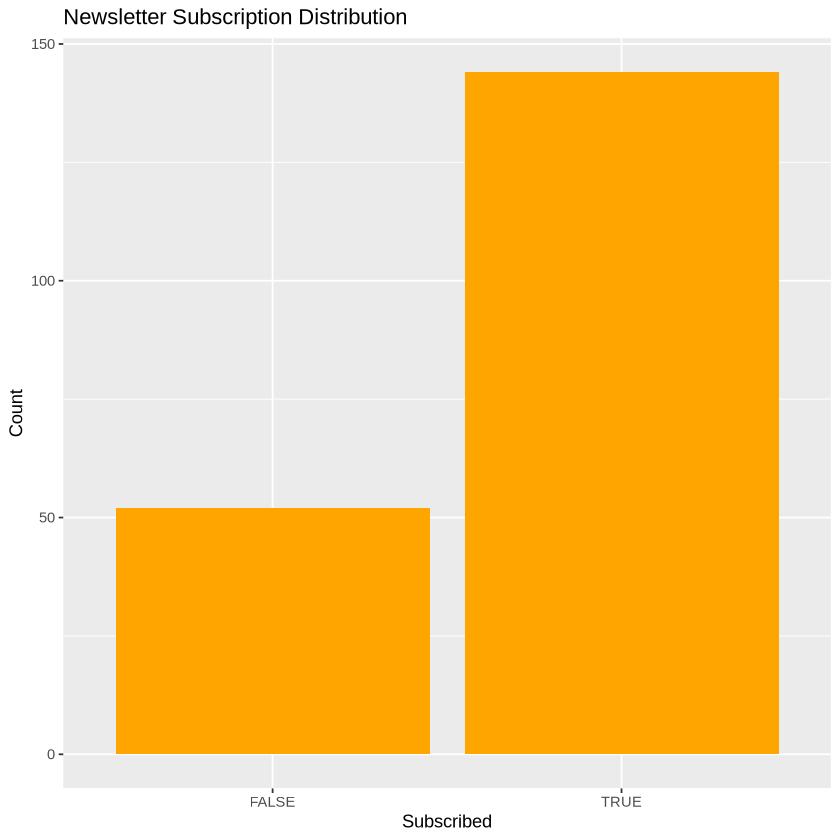

In [12]:
ggplot(players, aes(x = experience)) +
  geom_bar(fill = "skyblue") +
  labs(title = "Player Experience Distribution", x = "Experience", y = "Count")

ggplot(players, aes(x = Age, y = played_hours, color = experience)) +
  geom_point(size = 3, na.rm = TRUE, alpha = 0.8) +
  labs(title = "Played Hours vs Age based On Experience", x = "Age", y = "Played Hours", color = "Experience")

ggplot(players, aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point(size = 3, na.rm = TRUE, alpha = 0.8) +
  labs(title = "Played Hours vs Age based on Subscribe", x = "Age", y = "Played Hours", color = "Subscribe")

ggplot(players, aes(x = subscribe)) +
  geom_bar(fill = "orange") +
  labs(title = "Newsletter Subscription Distribution", x = "Subscribed", y = "Count")

## 3. Exploratory Data Analysis and Visualization
### Mean Value for Each Quantitative Variable
| Variable | Mean Value |
|----------|------------|
| Played Hours | 5.85 |
| Age | 21.14 |

### Interpretation
- The average number of played hours among players is 5.85 hours.
- The mean player age is 21.14 years, showing that the player group is relatively young.

### Player Experience Distribution
- The majority of players are categorized as amateurs, followed by veterans, regulars, beginners, and pros.
- This indicates that the dataset mainly consists of casual players.
- Ranking order: Amateur > Veteran > Regular > Beginner > Pro

### Relationship between Age and Played Hours
- The correlation between age and playtime is relatively weak to moderate.
- Younger players (ages 9–30) exhibit a wider range of played hours.
- In contrast, older players (above 30) usually play for fewer than 5 hours.

### Played Hours vs Age (Colored by Subscription)
- Most subscribers are aged 10–30 and tend to play longer hours.
- Non-subscribed players are concentrated at lower playtime levels, suggesting that greater engagement may lead to higher subscription rates.

### Newsletter Subscription Distribution
- Out of 196 players, 144 are subscribed.
- This reveals an imbalance in the target variable (subscription).

### Conclusion
- Casual (amateur) players dominate the dataset.
- Age is not a strong predictor of playing time.
- The subscription variable is imbalanced and requires careful consideration during modeling.

## 4. Methods dan Plan
### Planned Method
I will apply a Logistic Regression model to predict newsletter subscription using the predictors: experience, played_hours, and Age.

### Justification
- Since the response variable (subscribe) is binary (TRUE/FALSE), logistic regression is an appropriate choice. 
- This method also provides insight into how each predictor influences the likelihood of subscribing.

### Assumptions
- Observations are independent.
- The predictors have a linear relationship with log-odds of the response.

### Limitations
- Logistic regression may not capture non-linear effects unless transformations are applied.
- It is sensitive to outliers and class imbalance (if most players are subscribers).

## Model Comparison and Selection
- I will compare Logistic Regression with a k-Nearest Neighbors (k-NN) classifier to determine if a non-parametric model performs better. 
- Model performance will be validated using k-fold cross-validation. (k = 5)

## Data Processing Plan
- Clean the dataset to handle missing values, particularly in the age variable.
- Split the data into 70% training and 30% testing sets, with set.seed(2000) for reproducibility.
- Standardize numeric predictors (Age and played_hours) before applying k-NN.
- Train and evaluate the Logistic Regression model using cross-validation.
- Assess model performance based on accuracy, precision, and recall.